In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/netflix-shows/netflix_titles.csv


**Importing Python Modules**

In [88]:
# !pip install plotly
# !pip install cufflinks 
# !pip install textblob

^C
ERROR: Operation cancelled by user


^C
^C


In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')

In [114]:
import plotly as py
import cufflinks as cf

In [115]:
from plotly.offline import iplot

In [116]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

**Importing the Dataset**

In [117]:
df=pd.read_csv('../input/netflix-shows/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


**Summary of Dataset**

In [118]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 6234
Columns  : 12

Features :
     : ['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']

Missing values    : 3036

Unique values :  
 show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
show_id         6234 non-null int64
type            6234 non-null object
title           6234 non-null object
director        4265 non-null object
cast            5664 non-null object
country         5758 non-null object
date_added      6223 non-null object
release_year    6234 non-null int64
rating          6224 non-null object
duration        6234 non-null object
listed_in       6234 non-null object
description     6234 non-null object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [120]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [121]:
df=df.dropna()

In [122]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...
...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"August 30, 2019",2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan","August 2, 2019",2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady..."
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States","August 15, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"April 9, 2019",2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...


**Changing the  to Date time format**

In [123]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);
#df.year_added = df.year_added.astype(float)
#df.style.set_precision(0)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9


## Type

In [124]:
df['type'].value_counts()

Movie      3678
TV Show      96
Name: type, dtype: int64

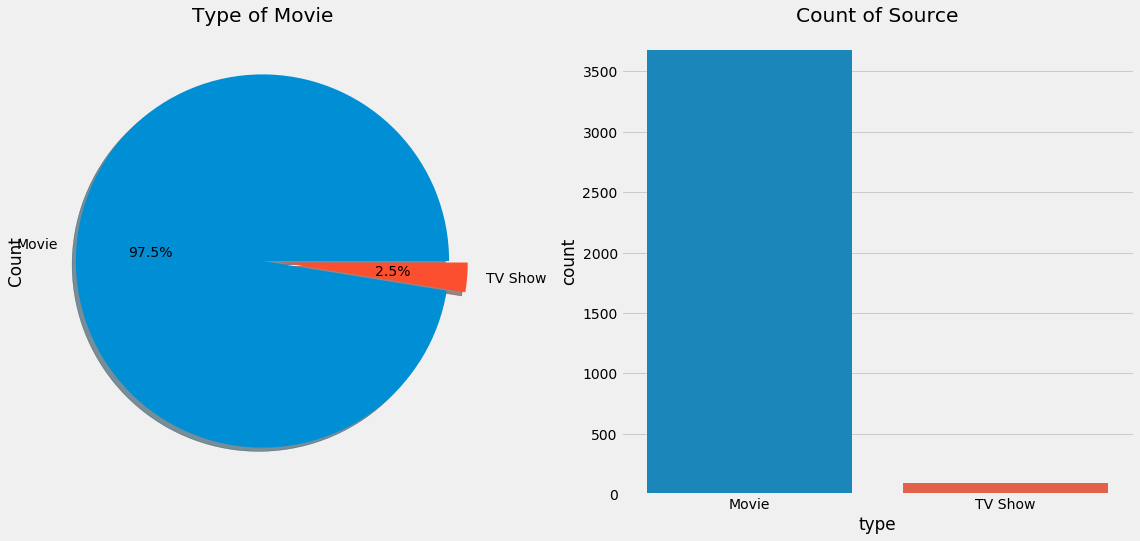

In [125]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Type of Movie')
ax[0].set_ylabel('Count')
sns.countplot('type',data=df,ax=ax[1],order=df['type'].value_counts().index)
ax[1].set_title('Count of Source')
plt.show()

So 98 % items in the dataset are movies and remaining small percentage is TV show

## Movie Rating

In [126]:
df['rating'].value_counts()

TV-MA       1189
TV-14        917
R            501
TV-PG        358
PG-13        278
PG           176
NR           175
TV-G          54
TV-Y7         48
G             35
TV-Y          24
TV-Y7-FV      11
UR             7
NC-17          1
Name: rating, dtype: int64

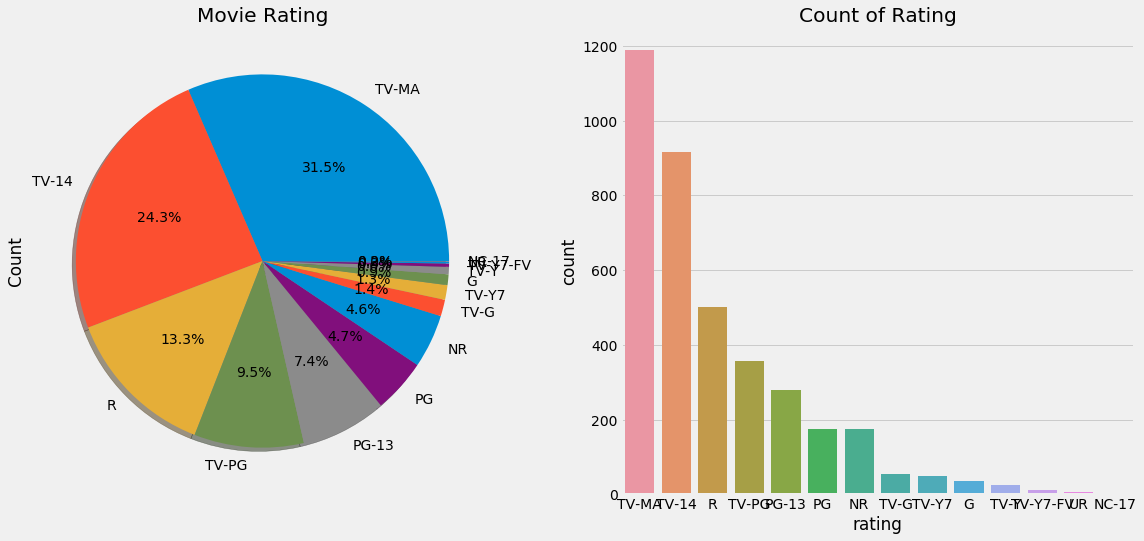

In [127]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Movie Rating')
ax[0].set_ylabel('Count')
sns.countplot('rating',data=df,ax=ax[1],order=df['rating'].value_counts().index)
ax[1].set_title('Count of Rating')
plt.show()

31.5% Fall in catogery TV-MA ("TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.)

24.3% fall in catigery TV-14 (Programs rated TV-14 contains material that parents or adult guardians may find unsuitable for children under the age of 14.

9.5 % fall in category TV-PG (TV-PG: Parental guidance suggested. This program contains material that parents may find unsuitable for younger children)

## Country

In [128]:
df.groupby('country').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5546,80156408,Movie,Una,Benedict Andrews,"Rooney Mara, Ben Mendelsohn, Riz Ahmed, Ruby S...","United Kingdom, Canada, United States",2018-04-01,2016,R,94 min,"Dramas, International Movies",A young woman tracks down the older man who pr...,1,2018,4
5550,80131414,Movie,Born to Be Free,Gayane Petrosyan,Casting a light on the mistreatment of sea mam...,"United Kingdom, Russia",2017-04-01,2016,TV-14,74 min,"Documentaries, International Movies",Casting a light on the mistreatment of sea mam...,1,2017,4
5906,80007778,TV Show,World of Winx,Iginio Straffi,"Haven Paschall, Alysha Deslorieux, Jessica Paq...","Italy, United States",2017-06-16,2017,TV-Y7,2 Seasons,Kids' TV,"The reality show ""WOW!"" engages the Winx in th...",16,2017,6
6006,70180293,TV Show,The Cat in the Hat Knows a Lot About That!,Tony Collingwood,"Martin Short, Alexa Torrington, Jacob Ewaniuk,...","Canada, United Kingdom, United States",2017-01-15,2014,TV-Y,2 Seasons,Kids' TV,"The Cat in the Hat is back – and this time, he...",15,2017,1


In [129]:
df.groupby('country')['show_id'].count().sort_values(ascending=False)

country
United States               1323
India                        707
United Kingdom               152
Canada                        78
Spain                         72
                            ... 
Singapore, France              1
Singapore, Japan, France       1
Singapore, Malaysia            1
Singapore, United States       1
Norway, Denmark, Sweden        1
Name: show_id, Length: 433, dtype: int64

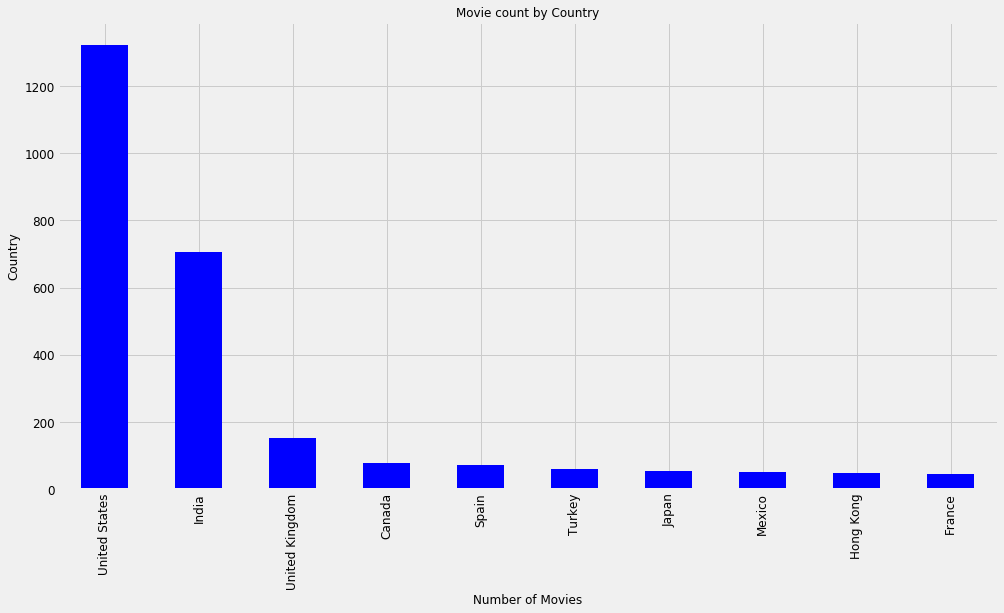

In [130]:
group_country_movies=df.groupby('country')['show_id'].count().sort_values(ascending=False).head(10);
plt.subplots(figsize=(15,8));
group_country_movies.plot('bar',fontsize=12,color='blue');
plt.xlabel('Number of Movies',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Movie count by Country',fontsize=12)
plt.ioff()

So we can say most movies are from Hollywood,Bollywood and British Film industry

**How many Movies Per Year?**

In [131]:
df.groupby('year_added')

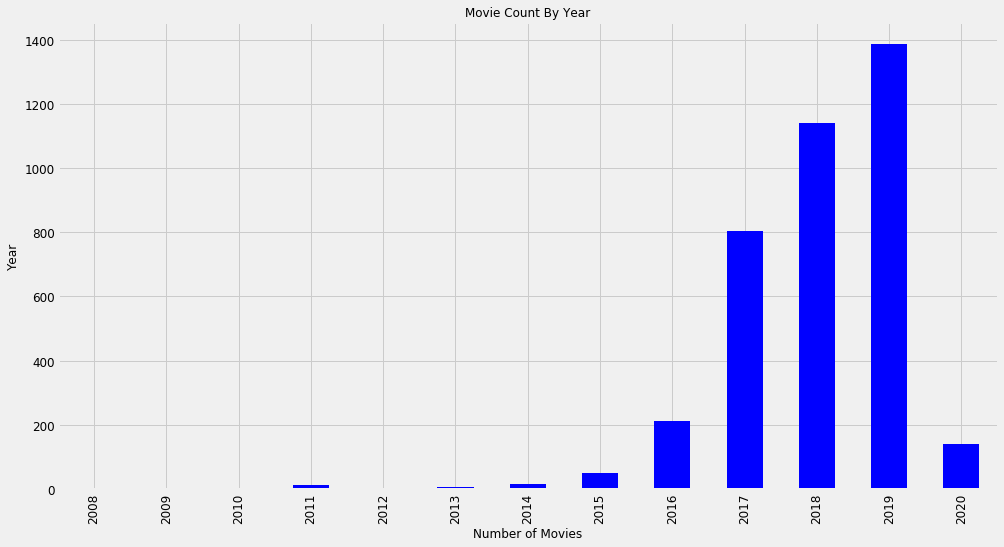

In [132]:
group_country_movies=df.groupby('year_added')['show_id'].count()
plt.subplots(figsize=(15,8));
group_country_movies.plot('bar',fontsize=12,color='blue');
plt.xlabel('Number of Movies',fontsize=12)
plt.ylabel('Year',fontsize=12)
plt.title('Movie Count By Year',fontsize=12)
plt.ioff()

Every Year the movie Count is increasing indicating that popularity of Netfilx is increasing every years.

**Which Month has more movies Added?**

In [133]:
df['month_added'].value_counts()

1     406
12    406
10    398
11    380
3     359
8     298
7     286
4     267
5     261
9     257
2     234
6     222
Name: month_added, dtype: int64

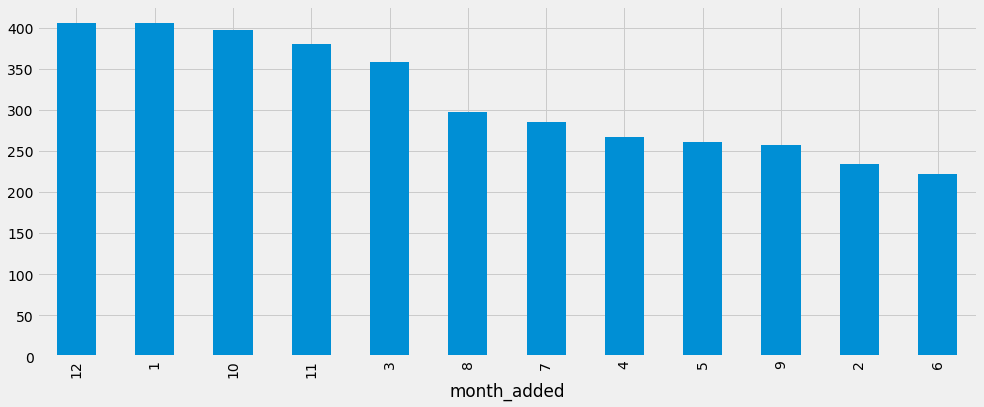

In [134]:
ax = df.groupby('month_added')['show_id'].count().sort_values(ascending=False).plot('bar',figsize=(15,6))
plt.show()

We see more movies are added in the month of September followed by October and March.

**Duration of Movie**

In [135]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142,80063224,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2019-08-30,2019,TV-PG,7 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,30,2019,8
6158,80164216,TV Show,Miraculous: Tales of Ladybug & Cat Noir,Thomas Astruc,"Cristina Vee, Bryce Papenbrook, Keith Silverst...","France, South Korea, Japan",2019-08-02,2018,TV-Y7,4 Seasons,"Kids' TV, TV Action & Adventure","When Paris is in peril, Marinette becomes Lady...",2,2019,8
6167,80115328,TV Show,Sacred Games,"Vikramaditya Motwane, Anurag Kashyap","Saif Ali Khan, Nawazuddin Siddiqui, Radhika Ap...","India, United States",2019-08-15,2019,TV-MA,2 Seasons,"Crime TV Shows, International TV Shows, TV Dramas",A link in their pasts leads an honest cop to a...,15,2019,8
6182,80176842,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,2019-04-09,2019,TV-14,4 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...,9,2019,4


In [136]:
df['duration']

0          90 min
4          99 min
6         110 min
7          60 min
9          90 min
          ...    
6142    7 Seasons
6158    4 Seasons
6167    2 Seasons
6182    4 Seasons
6213    3 Seasons
Name: duration, Length: 3774, dtype: object

In [140]:

df['season_count'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" in x['duration'] else np.nan, axis = 1)
df['duration_in_min'] = df.apply(lambda x : x['duration'].split(" ")[0] if "Season" not in x['duration'] else np.nan, axis = 1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added,season_count,duration_in_min
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,2019,9,NaN,90
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,8,2017,9,NaN,99
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",8,2017,9,NaN,110
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,8,2017,9,NaN,60
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,8,2017,9,NaN,90


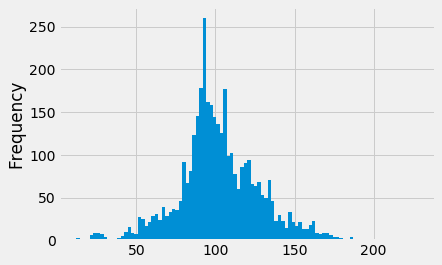

In [159]:
df['duration_in_min'].dropna().astype(int).plot('hist', bins= 100)


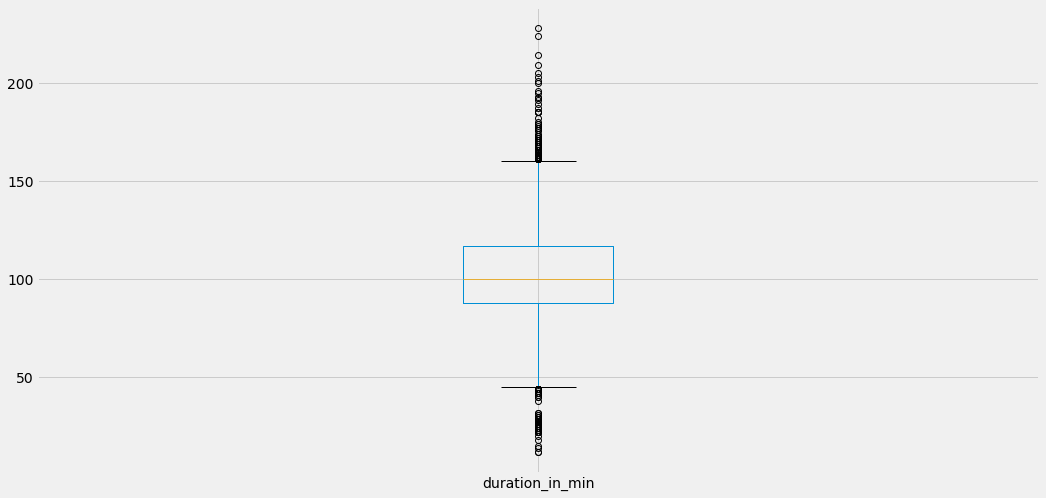

In [163]:
df['duration_in_min'].dropna().astype(int).plot('box', figsize=(16,8))

In [177]:
df["title"].str.split('(').str[0].value_counts()

Baahubali: The Beginning                     4
Game Over                                    3
The Silence                                  3
Baahubali 2: The Conclusion                  3
Benji                                        2
                                            ..
Welcome to Monster High: The Origin Story    1
Hitch                                        1
Alejandro Sanz: What I Was Is What I Am      1
Thriller                                     1
Jackie Brown                                 1
Name: title, Length: 3743, dtype: int64

**Which are most popular words for Title?**

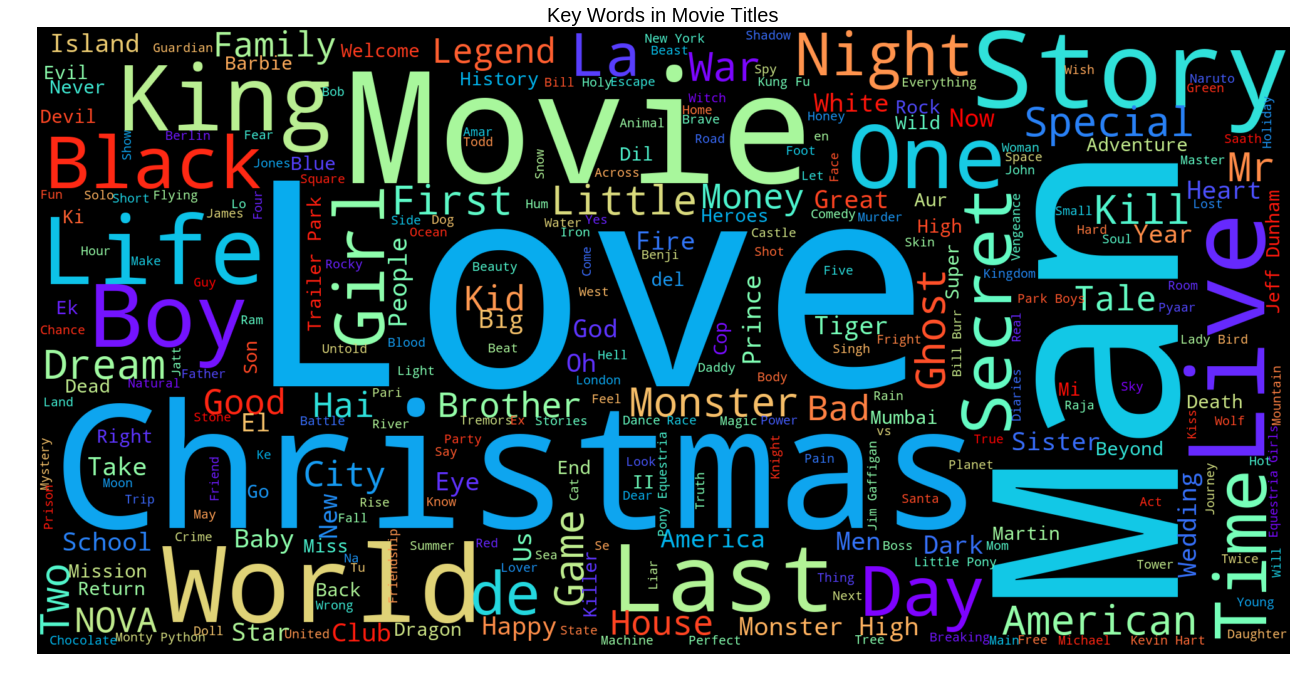

In [179]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from PIL import Image
wrds1 = df["title"].str.split("(").str[0].value_counts().keys()

wc1 = WordCloud(stopwords=STOPWORDS,scale=5,max_words=1000,colormap="rainbow",background_color="black").generate(" ".join(wrds1))
plt.figure(figsize=(20,14))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
plt.title("Key Words in Movie Titles",color='black',fontsize=20)
plt.show()

Love,Man,Christmas etc are some of the most prominent words for movie Title 

## Description?

In [200]:
df['description'].str.split()

0       [Before, planning, an, awesome, wedding, for, ...
4       [When, nerdy, high, schooler, Dani, finally, a...
6       [In, a, dystopian, future,, an, insurance, adj...
7       [Fabrizio, Copano, takes, audience, participat...
9       [A, struggling, couple, can't, believe, their,...
                              ...                        
6142    [A, talented, batch, of, amateur, bakers, face...
6158    [When, Paris, is, in, peril,, Marinette, becom...
6167    [A, link, in, their, pasts, leads, an, honest,...
6182    [Male, celebs, play, make-believe, as, high, s...
6213    [Destiny, brings, Mecnun, and, Leyla, together...
Name: description, Length: 3774, dtype: object

In [202]:
len(df['description'][0].split())

23

In [195]:
#df['description'][1]
df['length']=df['description'].apply(lambda x : len(x.split()))
df.dropna();

In [196]:
df['length']

0       23
4       26
6       23
7       23
9       24
        ..
6142    26
6158    23
6167    28
6182    22
6213    23
Name: length, Length: 3774, dtype: int64

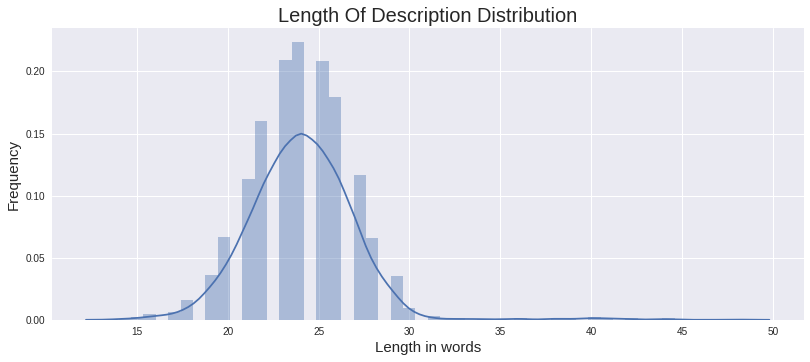

In [199]:
plt.figure(figsize=(12,5))

g = sns.distplot(df['length'])
g.set_title("Length Of Description Distribution", fontsize=20)
g.set_xlabel("Length in words", fontsize=15)
g.set_ylabel("Frequency", fontsize=15)


plt.show()

We can see that the many reviews are in te ranged 21 to 26 words.

### Data Cleaning 

In [ ]:
#' '.join(df['description'].tolist())

### Contractions

In [216]:
def cont_to_exp(x):
    contractions = {
    "ain't": "am not",
      "aren't": "are not",
      "can't": "cannot",
      "can't've": "cannot have",
      "'cause": "because",
      "could've": "could have",
      "couldn't": "could not",
      "couldn't've": "could not have",
      "didn't": "did not",
      "doesn't": "does not",
      "don't": "do not",
      "hadn't": "had not",
      "hadn't've": "had not have",
      "hasn't": "has not",
      "haven't": "have not",
      "he'd": "he would",
      "he'd've": "he would have",
      "he'll": "he will",
      "he'll've": "he will have",
      "he's": "he is",
      "how'd": "how did",
      "how'd'y": "how do you",
      "how'll": "how will",
      "how's": "how is",
      "I'd": "I would",
      "I'd've": "I would have",
      "I'll": "I will",
      "I'll've": "I will have",
      "I'm": "I am",
      "I've": "I have",
      "isn't": "is not",
      "it'd": "it had",
      "it'd've": "it would have",
      "it'll": "it will",
      "it'll've": "it will have",
      "it's": "it is",
      "let's": "let us",
      "ma'am": "madam",
      "mayn't": "may not",
      "might've": "might have",
      "mightn't": "might not",
      "mightn't've": "might not have",
      "must've": "must have",
      "mustn't": "must not",
      "mustn't've": "must not have",
      "needn't": "need not",
      "needn't've": "need not have",
      "o'clock": "of the clock",
      "oughtn't": "ought not",
      "oughtn't've": "ought not have",
      "shan't": "shall not",
      "sha'n't": "shall not",
      "shan't've": "shall not have",
      "she'd": "she would",
      "she'd've": "she would have",
      "she'll": "she will",
      "she'll've": "she will have",
      "she's": "she is",
      "should've": "should have",
      "shouldn't": "should not",
      "shouldn't've": "should not have",
      "so've": "so have",
      "so's": "so is",
      "that'd": "that would",
      "that'd've": "that would have",
      "that's": "that is",
      "there'd": "there had",
      "there'd've": "there would have",
      "there's": "there is",
      "they'd": "they would",
      "they'd've": "they would have",
      "they'll": "they will",
      "they'll've": "they will have",
      "they're": "they are",
      "they've": "they have",
      "to've": "to have",
      "wasn't": "was not",
      "we'd": "we had",
      "we'd've": "we would have",
      "we'll": "we will",
      "we'll've": "we will have",
      "we're": "we are",
      "we've": "we have",
      "weren't": "were not",
      "what'll": "what will",
      "what'll've": "what will have",
      "what're": "what are",
      "what's": "what is",
      "what've": "what have",
      "when's": "when is",
      "when've": "when have",
      "where'd": "where did",
      "where's": "where is",
      "where've": "where have",
      "who'll": "who will",
      "who'll've": "who will have",
      "who's": "who is",
      "who've": "who have",
      "why's": "why is",
      "why've": "why have",
      "will've": "will have",
      "won't": "will not",
      "won't've": "will not have",
      "would've": "would have",
      "wouldn't": "would not",
      "wouldn't've": "would not have",
      "y'all": "you all",
      "y'alls": "you alls",
      "y'all'd": "you all would",
      "y'all'd've": "you all would have",
      "y'all're": "you all are",
      "y'all've": "you all have",
      "you'd": "you had",
      "you'd've": "you would have",
      "you'll": "you you will",
      "you'll've": "you you will have",
      "you're": "you are",
      "you've": "you have"
    }
    if type(x) is str:
        x =x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key,value)
        return x
    else:
        return x
        

In [217]:
x = "I don't know what date is today, I am 5'8"

In [218]:
print(cont_to_exp(x))

I do not know what date is today, I am 5'8


Here we have written a code by which we can expand the contractions used in the text.We can apply this cleaning technique to our description column.

In [219]:
%%time 
df['description'] = df['description'].apply(lambda x: cont_to_exp(x))

CPU times: user 250 ms, sys: 3.58 ms, total: 254 ms
Wall time: 251 ms


In [220]:
#print(' '.join(df['description'].tolist()))
df['description'].head()

0    Before planning an awesome wedding for his gra...
4    When nerdy high schooler Dani finally attracts...
6    In a dystopian future, an insurance adjuster f...
7    Fabrizio Copano takes audience participation t...
9    A struggling couple cannot believe their luck ...
Name: description, dtype: object

So with the above code we have managed to convert the contractions and expanded them to full form.

### Length of Description Vs Rating

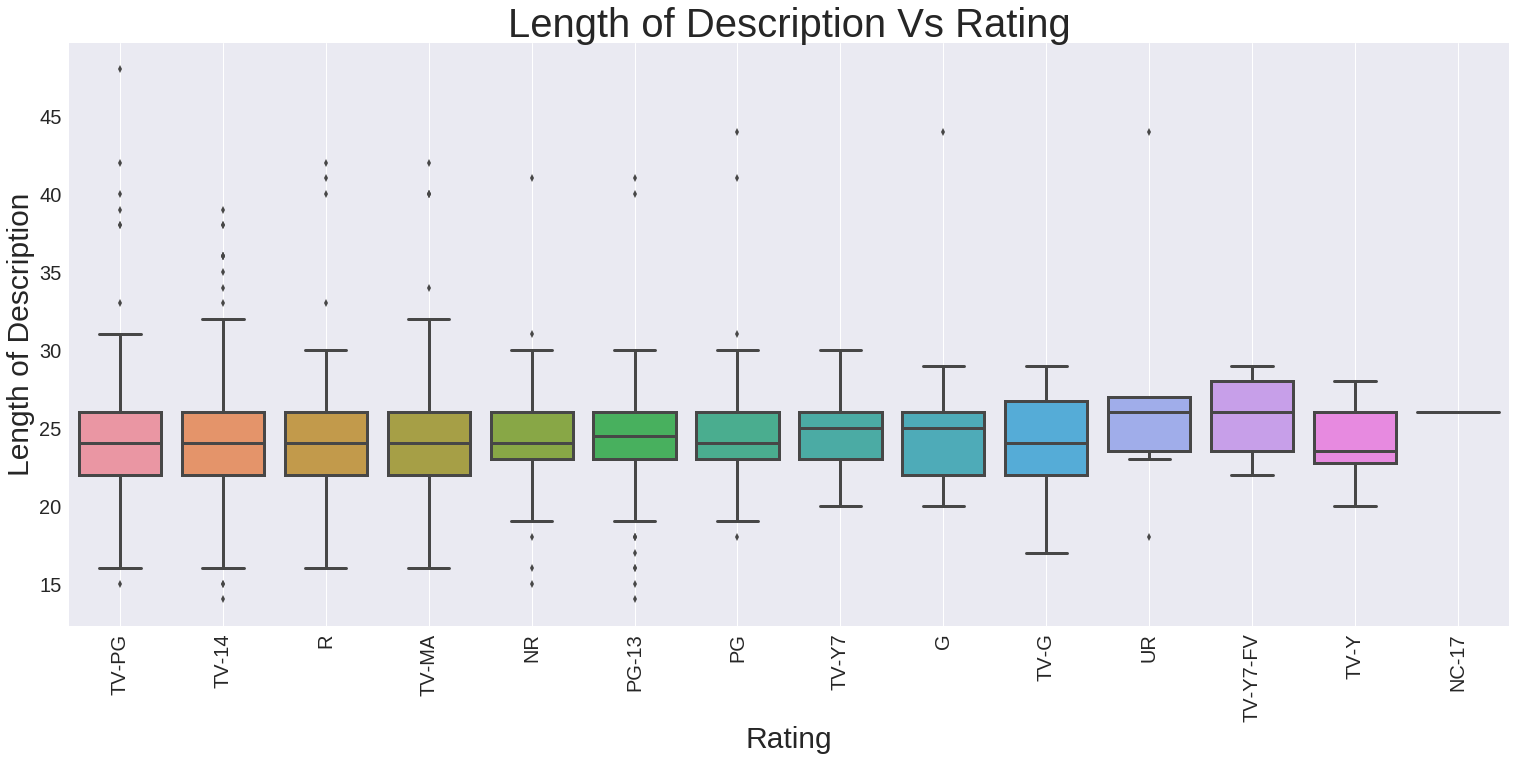

In [221]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="rating", y="length", data=df,width=0.8,linewidth=3)
ax.set_xlabel('Rating',fontsize=30)
ax.set_ylabel('Length of Description',fontsize=30)
plt.title('Length of Description Vs Rating',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)
ax.tick_params(axis='y',labelsize=20,rotation=0)
plt.grid()
plt.ioff()

Suprisingly the mean length of the description across all the ratings remain same.

## Listed in?

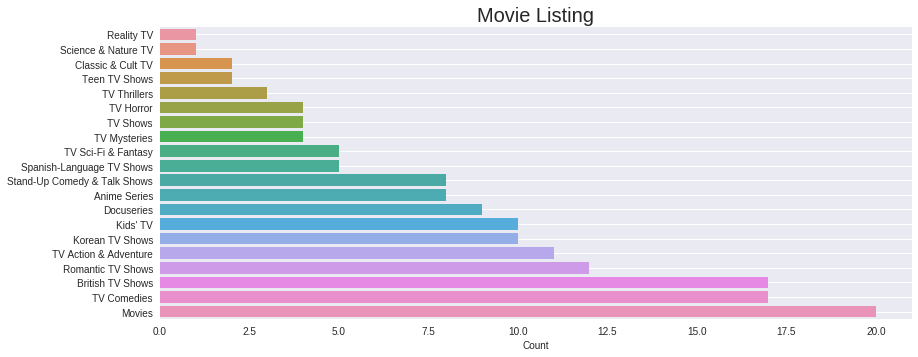

In [222]:
import plotly.graph_objects as go
from collections import Counter
col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
plt.figure(figsize=(12,5))
sns.barplot(values[0:20],labels[0:20]);
plt.xlabel('Count',fontsize=10)
#plt.ylabel('',fontsize=20)
plt.title('Movie Listing',fontsize=20)
#ax.tick_params(labelsize=20)
plt.grid()
plt.ioff()

More of the listings are in the Catogery International TV Shows,TV Drama and Movies

# TO BE CONTINUED